<a href="https://colab.research.google.com/github/Bagito999/Deep-Learning/blob/main/Deep_Learning_Covertdataset_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1, Loss: 1.9094206094741821, Val Loss: 1.8694950342178345
Epoch 2, Loss: 1.8696590662002563, Val Loss: 1.8308203220367432
Epoch 3, Loss: 1.8309354782104492, Val Loss: 1.7931855916976929
Epoch 4, Loss: 1.7932480573654175, Val Loss: 1.7565762996673584
Epoch 5, Loss: 1.7565821409225464, Val Loss: 1.7209701538085938
Epoch 6, Loss: 1.720918893814087, Val Loss: 1.6863396167755127
Epoch 7, Loss: 1.6862313747406006, Val Loss: 1.6526538133621216
Epoch 8, Loss: 1.6524873971939087, Val Loss: 1.6198800802230835
Epoch 9, Loss: 1.6196554899215698, Val Loss: 1.587988018989563
Epoch 10, Loss: 1.5877056121826172, Val Loss: 1.5569522380828857


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14526/14526 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.7362 - loss: 0.6302 - val_accuracy: 0.7792 - val_loss: 0.5112
Epoch 2/10
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.7874 - loss: 0.4948 - val_accuracy: 0.8006 - val_loss: 0.4698
Epoch 3/10
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.8056 - loss: 0.4579 - val_accuracy: 0.8086 - val_loss: 0.4479
Epoch 4/10
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.8167 - loss: 0.4352 - val_accuracy: 0.8219 - val_loss: 0.4268
Epoch 5/10
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.8236 - loss: 0.4193 - val_accuracy: 0.8293 - val_loss: 0.4082
Epoch 6/10
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.8294 - loss: 0.4094 - val_accuracy: 0.8354 - val_loss: 0.4005
Epoch 7/10
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.8349 - loss: 0.3996 - val_accuracy: 0.8335 - val_loss: 0.3968
Epoch 8/10
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.8369 - lo

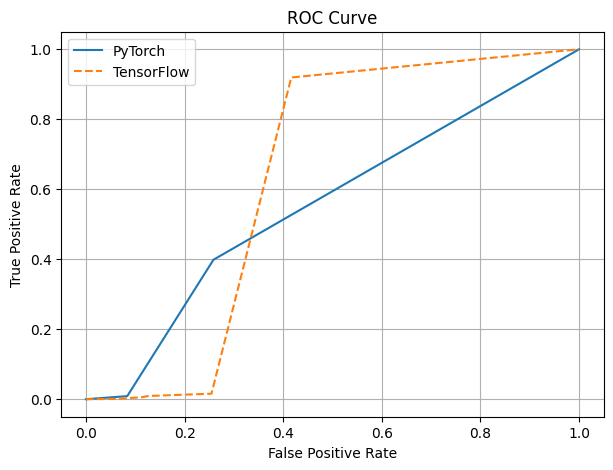

In [3]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Load dataset
data_path = '/content/drive/MyDrive/Deep Learning/compressed_data.csv.gz'
df = pd.read_csv(data_path)

# Remove NaN values in target
df = df.dropna(subset=['Cover_Type'])

# Split features (X) and target (y)
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"] - 1  # Adjust label to start from 0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch Tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.long)
y_test_torch = torch.tensor(y_test.values, dtype=torch.long)

# Define PyTorch Model
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialize PyTorch Model
input_size = X_train.shape[1]
hidden_size = 128
num_classes = len(np.unique(y))
model_torch = MLPModel(input_size, hidden_size, num_classes)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_torch.parameters(), lr=0.001)

# PyTorch Training with Early Stopping
best_loss = float("inf")
patience = 0
early_stop_patience = 5

for epoch in range(10):
    optimizer.zero_grad()
    outputs = model_torch(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        val_outputs = model_torch(X_test_torch)
        val_loss = criterion(val_outputs, y_test_torch)

    print(f"Epoch {epoch+1}, Loss: {loss.item()}, Val Loss: {val_loss.item()}")

    if val_loss.item() < best_loss:
        best_loss = val_loss.item()
        patience = 0
    else:
        patience += 1
    if patience >= early_stop_patience:
        print("Early stopping!")
        break

# PyTorch Evaluation
y_pred_torch = torch.argmax(model_torch(X_test_torch), axis=1).numpy()

# Menyimpan metrik evaluasi PyTorch
metrik_torch = {
    "Akurasi": accuracy_score(y_test, y_pred_torch),
    "Presisi": precision_score(y_test, y_pred_torch, average='weighted'),
    "Recall": recall_score(y_test, y_pred_torch, average='weighted'),
    "F1 Score": f1_score(y_test, y_pred_torch, average='weighted')
}

# Convert to TensorFlow Tensors
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.int32)

# Define TensorFlow Model
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(input_size,)),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile TensorFlow Model
model_tf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train TensorFlow Model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_tf.fit(X_train_tf, y_train_tf, epochs=10, validation_data=(X_test_tf, y_test_tf), callbacks=[early_stopping])

# Evaluate TensorFlow Model
y_pred_tf = np.argmax(model_tf.predict(X_test_tf), axis=1)

# Menyimpan metrik evaluasi TensorFlow
metrik_tf = {
    "Akurasi": accuracy_score(y_test, y_pred_tf),
    "Presisi": precision_score(y_test, y_pred_tf, average='weighted'),
    "Recall": recall_score(y_test, y_pred_tf, average='weighted'),
    "F1 Score": f1_score(y_test, y_pred_tf, average='weighted')
}

# Menampilkan Hasil Perbandingan Model**
print("\n--- 📊 Perbandingan Evaluasi Model ---")
for key in metrik_torch.keys():
    print(f"🔹 {key} PyTorch: {metrik_torch[key]:.4f}, TensorFlow: {metrik_tf[key]:.4f}")

# ROC Curve
fpr_torch, tpr_torch, _ = roc_curve(y_test, y_pred_torch, pos_label=1)
fpr_tf, tpr_tf, _ = roc_curve(y_test, y_pred_tf, pos_label=1)

plt.figure(figsize=(7,5))
plt.plot(fpr_torch, tpr_torch, label='PyTorch')
plt.plot(fpr_tf, tpr_tf, label='TensorFlow', linestyle='dashed')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


## Analisis

###  Interpretasi Hasil:
1. **Akurasi**  
   **Akurasi TensorFlow (84.59%) jauh lebih tinggi dibandingkan PyTorch (52.28%)**. Ini menunjukkan bahwa model yang dilatih menggunakan TensorFlow lebih mampu mengklasifikasikan data dengan benar dibandingkan model PyTorch.

2. **Presisi**  
   **TensorFlow (84.58%) memiliki presisi yang lebih tinggi dibandingkan PyTorch (56.28%)**. Artinya, model TensorFlow lebih jarang mengklasifikasikan data negatif sebagai positif dibandingkan model PyTorch.

3. **Recall**  
   **TensorFlow (84.59%) juga memiliki recall yang lebih tinggi dibandingkan dengan PyTorch (52.28%)**, menunjukkan bahwa model ini lebih baik dalam mendeteksi semua sampel positif dibandingkan PyTorch.

4. **F1 Score**  
   **F1 Score TensorFlow (84.41%) lebih tinggi dibandingkan dengan nilai PyTorch (48.78%)**, yang berarti modelnya lebih seimbang antara presisi dan recall dibandingkan model PyTorch.


## 📌 Evaluasi Model dengan Metrik Matematis

Berikut adalah rumus-rumus evaluasi yang digunakan untuk mengukur performa model deep learning:

### 1. **Akurasi (Accuracy)**
Akurasi mengukur seberapa sering model membuat prediksi yang benar:
\[
$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$
\]
Dimana:
- \(TP\) = True Positives (Prediksi positif yang benar)
- \(TN\) = True Negatives (Prediksi negatif yang benar)
- \(FP\) = False Positives (Prediksi positif yang salah)
- \(FN\) = False Negatives (Prediksi negatif yang salah)

---

### 2. **Presisi (Precision)**
Presisi mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan semua prediksi positif:
\[
$Precision = \frac{TP}{TP + FP}$
\]
Presisi tinggi berarti model jarang memberikan prediksi positif yang salah (FP rendah).

---

### 3. **Recall (Sensitivity atau True Positive Rate)**
Recall mengukur seberapa baik model dalam menemukan semua sampel positif yang sebenarnya:
\[
$Recall = \frac{TP}{TP + FN}$
\]
Recall tinggi berarti model jarang melewatkan sampel positif yang sebenarnya (FN rendah).

---

### 4. **F1-Score**
F1-Score adalah rata-rata harmonik antara presisi dan recall, berguna ketika ada ketidakseimbangan kelas:
\[
$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$
\]
F1-Score memberikan keseimbangan antara presisi dan recall.

---

### 5. **AUC (Area Under Curve)**
AUC mengukur luas di bawah kurva ROC. Nilai berkisar antara 0 hingga 1:
\[
$AUC = \int_0^1 TPR(FPR) \, dFPR$
\]
Semakin besar AUC, semakin baik model dalam membedakan kelas positif dan negatif.

---

### 6. **ROC Curve (Receiver Operating Characteristic Curve)**
ROC adalah grafik yang menunjukkan hubungan antara tingkat positif palsu (FPR) dan tingkat positif sejati (TPR):
\[
$TPR = \frac{TP}{TP + FN}$
\]
\[
$FPR = \frac{FP}{FP + TN}$
\]
Kurva ini membantu mengevaluasi keseimbangan antara sensitivitas dan spesifisitas model.

---